# x0 cut prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

## Loading the data

In [2]:
# Load the data using pandas
data = pd.read_csv('../data/cut_x0.csv')
data = data.head(-1000) # remove last experiment
data.head(10)

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50,tp,deviationc
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.000000,0.543273
1,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.004115,0.541849
2,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.008230,0.540459
3,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.012346,0.539104
4,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.016461,0.537783
5,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.020576,0.536301
6,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.024691,0.534856
7,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.028807,0.533446
8,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.032922,0.532073
9,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.037037,0.530738


## Creating the regressor

In [3]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'tp',
    output = 'deviationc'
)

In [4]:
# Print a summary of the data
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Position variable:
	- tp : numerical, [ 0.0 / 5.0 ]
Output variable:
	- deviationc : numerical, [ -3.16506211149574 / 7.228601057768613 ]

Inputs
------------------------------------------------------------

(880000, 19)

Outputs
------------------------------------------------------------

(880000,)


## Training methods

### Autotuning

In [5]:
best_config = reg.autotune(
    save_path='best_x0_model',
    trials=100,
    max_epochs=50, 
    layers=[3, 5],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)

[I 2022-04-26 16:21:34,523] A new study created in memory with name: no-name-5e076e42-6269-4ddc-9483-1c1d6030b173


INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 16:22:43,373] Trial 0 finished with value: 0.0010947671253234148 and parameters: {'nb_layers': 3, 'n_units_l0': 64, 'n_units_l1': 64, 'n_units_l2': 192, 'learning_rate': 0.0001892618870895156, 'dropout': 0.0}. Best is trial 0 with value: 0.0010947671253234148.
[I 2022-04-26 16:24:28,308] Trial 1 finished with value: 0.002131642075255513 and parameters: {'nb_layers': 3, 'n_units_l0': 64, 'n_units_l1': 128, 'n_units_l2': 64, 'learning_rate': 0.00012159993598403335, 'dropout': 0.1}. Best is trial 0 with value: 0.0010947671253234148.
[I 2022-04-26 16:28:19,635] Trial 2 finished with value: 0.013464749790728092 and parameters: {'nb_layers': 3, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 256, 'learning_rate': 4.3673461116259996e-05, 'dropout': 0.5}. Best is trial 0 with value: 0.0010947671253234148.
[I 2022-04-26 16:32:19,186] Trial 3 finished with value: 0.005091500002890825 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_un

INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 17:00:40,380] Trial 11 finished with value: 0.0008480612887069583 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 192, 'learning_rate': 0.00033990792735319784, 'dropout': 0.0}. Best is trial 11 with value: 0.0008480612887069583.
[I 2022-04-26 17:02:38,535] Trial 12 finished with value: 0.0016138196224346757 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 192, 'learning_rate': 1.039331562118248e-05, 'dropout': 0.0}. Best is trial 11 with value: 0.0008480612887069583.
[I 2022-04-26 17:04:55,854] Trial 13 finished with value: 0.0010705573949962854 and parameters: {'nb_layers': 3, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2': 192, 'learning_rate': 0.0004251290252118989, 'dropout': 0.0}. Best is trial 11 with value: 0.0008480612887069583.
[I 2022-04-26 17:08:01,271] Trial 14 finished with value: 0.0016517883632332087 and parameters: {'nb_layers': 3, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2':

INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 18:04:43,103] Trial 25 finished with value: 0.0008285949006676674 and parameters: {'nb_layers': 5, 'n_units_l0': 256, 'n_units_l1': 256, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0006209061197770162, 'dropout': 0.0}. Best is trial 25 with value: 0.0008285949006676674.
[I 2022-04-26 18:12:03,394] Trial 26 finished with value: 0.003326801350340247 and parameters: {'nb_layers': 5, 'n_units_l0': 256, 'n_units_l1': 256, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0005808351919805977, 'dropout': 0.1}. Best is trial 25 with value: 0.0008285949006676674.


INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 18:16:10,546] Trial 27 finished with value: 0.0007101647788658738 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0009825553707777355, 'dropout': 0.0}. Best is trial 27 with value: 0.0007101647788658738.
[I 2022-04-26 18:21:40,722] Trial 28 finished with value: 0.003131174948066473 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 128, 'learning_rate': 0.0006737615547016462, 'dropout': 0.1}. Best is trial 27 with value: 0.0007101647788658738.


INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 18:25:14,642] Trial 29 finished with value: 0.0006667192792519927 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.000965978184047188, 'dropout': 0.0}. Best is trial 29 with value: 0.0006667192792519927.
[I 2022-04-26 18:30:45,738] Trial 30 finished with value: 0.029785405844449997 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.000978753700786424, 'dropout': 0.5}. Best is trial 29 with value: 0.0006667192792519927.
[I 2022-04-26 18:33:52,408] Trial 31 finished with value: 0.000776848173700273 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 64, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0008828321299367997, 'dropout': 0.0}. Best is trial 29 with value: 0.0006667192792519927.
[I 2022-04-26 18:37:24,665] Trial 32 finished with val

INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 18:40:57,265] Trial 33 finished with value: 0.0006647944683209062 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0009408894548244117, 'dropout': 0.0}. Best is trial 33 with value: 0.0006647944683209062.
[I 2022-04-26 18:46:43,951] Trial 34 finished with value: 0.0039958166889846325 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0009140359829388305, 'dropout': 0.1}. Best is trial 33 with value: 0.0006647944683209062.
[I 2022-04-26 18:51:26,431] Trial 35 finished with value: 0.003869523061439395 and parameters: {'nb_layers': 5, 'n_units_l0': 128, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 128, 'learning_rate': 0.0005240212894630517, 'dropout': 0.1}. Best is trial 33 with value: 0.0006647944683209062.
[I 2022-04-26 18:54:59,644] Trial 36 finished with

INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 19:25:06,307] Trial 44 finished with value: 0.0006588302203454077 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 64, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.000983103294618667, 'dropout': 0.0}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 19:29:27,070] Trial 45 finished with value: 0.005265999119728804 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 64, 'n_units_l3': 256, 'n_units_l4': 128, 'learning_rate': 3.348830866994847e-05, 'dropout': 0.1}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 19:34:49,082] Trial 46 finished with value: 0.006870577577501535 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 64, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0006960089277776828, 'dropout': 0.2}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 19:37:47,065] Trial 47 finished with valu

[I 2022-04-26 21:07:46,068] Trial 70 finished with value: 0.004337321035563946 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 256, 'learning_rate': 0.00012279432264074668, 'dropout': 0.1}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 21:11:19,014] Trial 71 finished with value: 0.0007772672106511891 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0008436587050537601, 'dropout': 0.0}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 21:14:54,146] Trial 72 finished with value: 0.0007844232022762299 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 128, 'n_units_l3': 256, 'n_units_l4': 192, 'learning_rate': 0.0006861935533288591, 'dropout': 0.0}. Best is trial 44 with value: 0.0006588302203454077.
[I 2022-04-26 21:18:38,812] Trial 73 finished wit

INFO:tensorflow:Assets written to: best_x0_model/assets


[I 2022-04-26 21:31:14,049] Trial 77 finished with value: 0.0006421843427233398 and parameters: {'nb_layers': 5, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 192, 'n_units_l3': 64, 'n_units_l4': 192, 'learning_rate': 0.0006436764377700998, 'dropout': 0.0}. Best is trial 77 with value: 0.0006421843427233398.
[I 2022-04-26 21:34:25,561] Trial 78 finished with value: 0.010390521958470345 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 192, 'learning_rate': 0.0006684579361102389, 'dropout': 0.5}. Best is trial 77 with value: 0.0006421843427233398.
[I 2022-04-26 21:39:00,031] Trial 79 finished with value: 0.0031683107372373343 and parameters: {'nb_layers': 5, 'n_units_l0': 256, 'n_units_l1': 128, 'n_units_l2': 192, 'n_units_l3': 64, 'n_units_l4': 192, 'learning_rate': 0.0007398372105284969, 'dropout': 0.1}. Best is trial 77 with value: 0.0006421843427233398.
[I 2022-04-26 21:41:53,822] Trial 80 finished with value: 0.0010339173022657633 and parame

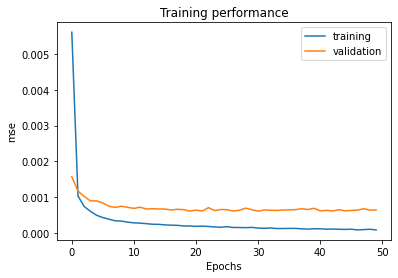

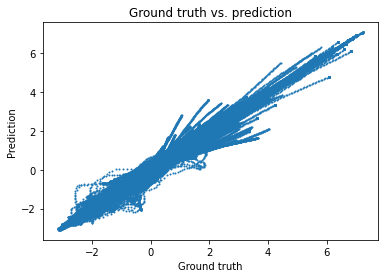

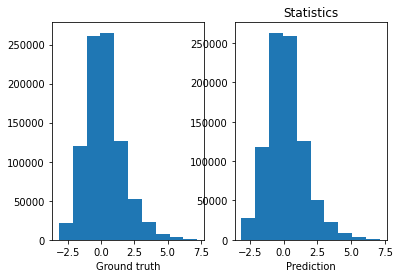

In [6]:
reg.training_summary()

### Alternative: define a custom network and do the optimization yourself

One can also run the autotuning for a limited number of epochs and then fine-tune the best configuration by training it longer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 68,737
Trainable params: 68,737
Non-traina

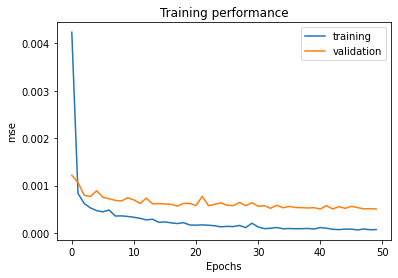

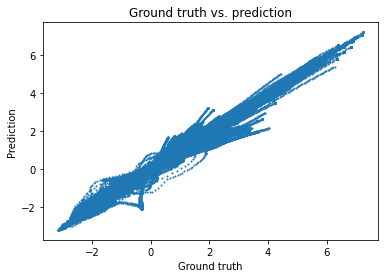

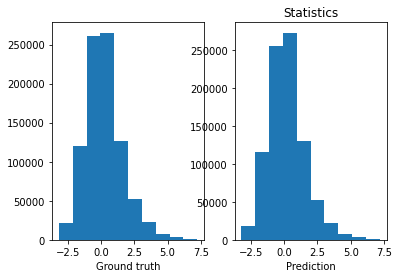

In [7]:
config = {
    'batch_size': 4096,
    'max_epochs': 50,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.005
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='best_x0_modelb', config=config, verbose=True)
reg.training_summary()

### Other alternative: the model has already been trained

We just need to reload it to make predictions.

In [8]:
reg.load(load_path='best_x0_model')

## Visualization

### Prediction for single process parameter values

Text(0, 0.5, 'deviationc')

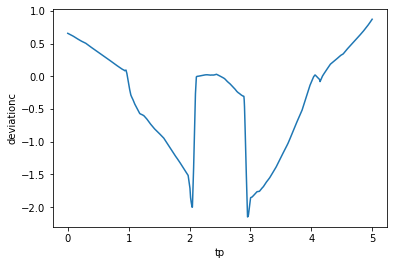

In [9]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft':410.0, 
        'Ziehspalt':2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30
    }, 
    nb_points=1000)

plt.figure()
plt.plot(x, y)
plt.xlabel('tp')
plt.ylabel('deviationc')

## Comparison with the ground truth on the training set

Randomly choose an id between 0 and 877 and compare the prediction to the ground truth.

Doe_ID 330


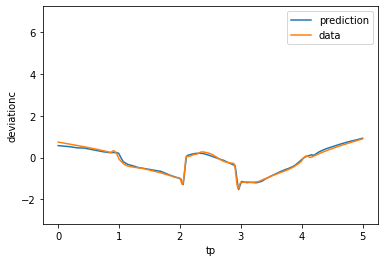

In [10]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
reg.compare(idx*1000, (idx+1)*1000)

In [11]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(FloatSlider(value=1.1862613636324533, description='Blechdicke', max=1.48, min=0.99, step…

## Alternative features

The features previsously chosen lead to a worse performance than the first manual trials... When using Material_ID and Stempel_ID instead of Blechdicke and Ziehspalt, it is satisfying again. 

In [12]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Material_ID', 
        'Niederhalterkraft', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Material_ID', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'tp',
    output = 'deviationc'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,377
Trainable params: 69,377
Non-traina

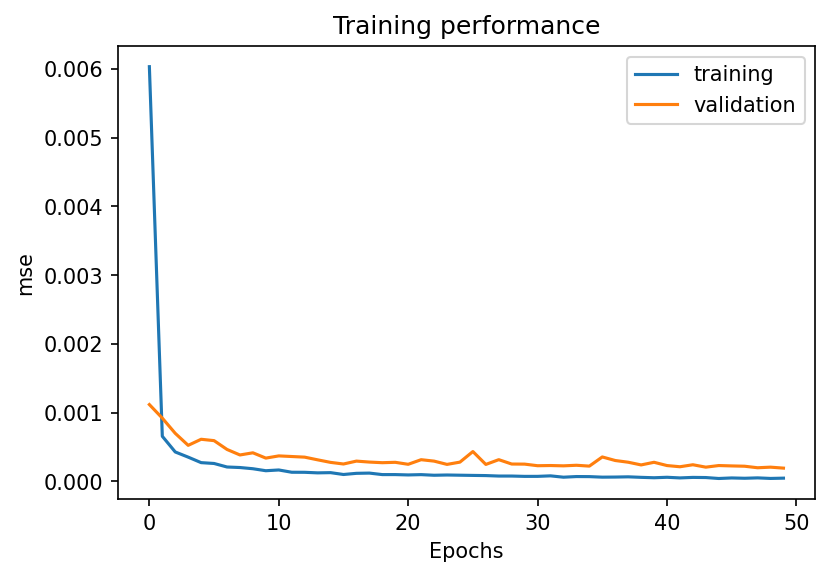

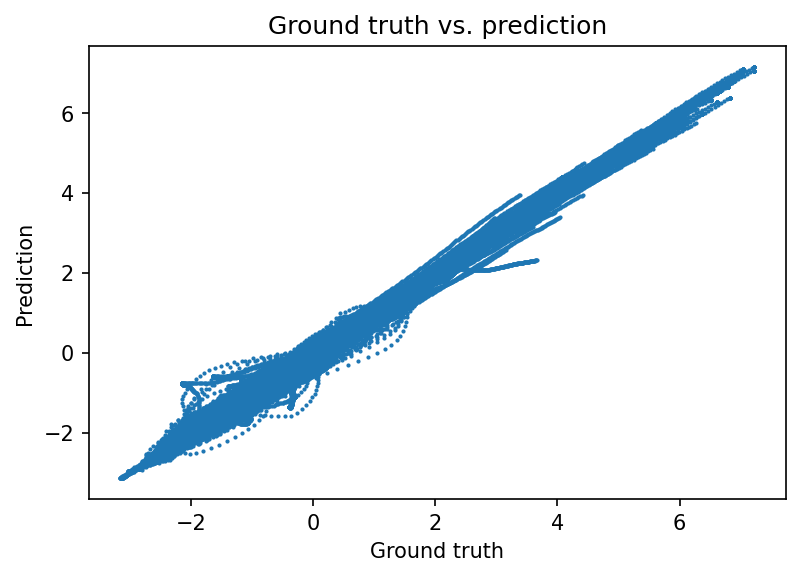

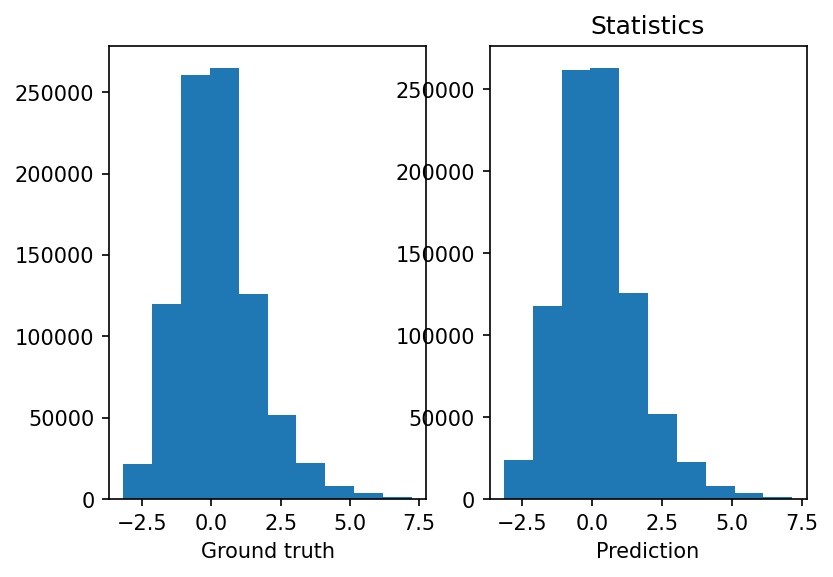

In [13]:
config = {
    'batch_size': 4096,
    'max_epochs': 50,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.005
}

reg.custom_model(save_path='best_modelc', config=config, verbose=True)
reg.training_summary()

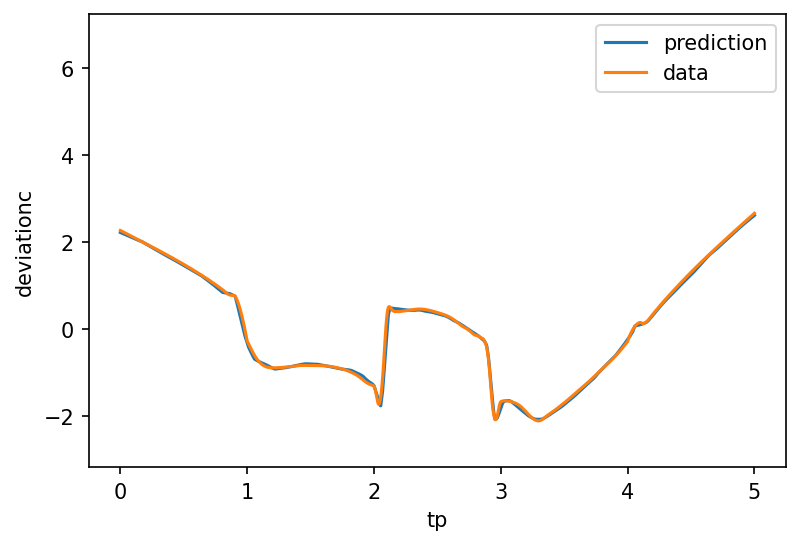

In [45]:
idx = np.random.choice(878)
reg.compare(idx*1000, (idx+1)*1000)

In [24]:
reg.X

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.72262093],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.71979355],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.71696618],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.70698517],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.70981259],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.71264001]])

In [25]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(Dropdown(description='Material_ID', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(va…